In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# In python script in vscode
# os.chdir(os.path.dirname(__file__))

current_dir = os.path.abspath("")
print(f"{current_dir=}")


# list all files in current directory

current_dir_files = os.listdir(current_dir)
print(f"{current_dir_files=}")

data_dir = os.path.abspath("../data/")
print(f"{data_dir=}")

os.listdir(data_dir)

current_dir='/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/Code-Along'
current_dir_files=['3-Image_processing.ipynb', '1-MLP_classification.ipynb', '2-MLP_image_classification.ipynb', '.ipynb_checkpoints', '0-MLP_regresson.ipynb']
data_dir='/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/data'


['Homer_Simpson_2006.png']

Original shape: (390, 190, 4)
New shape: (195, 95, 4)


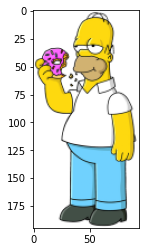

In [12]:
image = plt.imread(f"{data_dir}/Homer_Simpson_2006.png")
print(f"Original shape: {image.shape}")

resize_factor = .5
new_size = int(image.shape[1] * resize_factor), int(image.shape[0] * resize_factor)

image = cv2.resize(image, new_size)
print(f"New shape: {image.shape}")

plt.imshow(image)

## Kernels

In [14]:
ridge_filter = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

blur_filter = np.array([[.0625, .125, .0625], [.125, .25, .125], [.0625, .125, .0625]])

outline_filter = np.array([[-1, -1, -1], [-1, 4, -1], [-1, -1, -1]])


filters = [ridge_filter, blur_filter, outline_filter]
filter_names = ["ridge", "blur", "outline"]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/data/preprocessed_images'


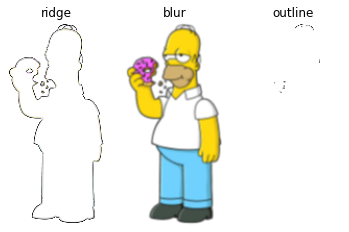

In [27]:
processed_images_path = f"{data_dir}/preprocessed_images"

try: 
    os.mkdir(processed_images_path)
except FileExistsError as err:
    print(err)

fig, axes = plt.subplots(1, len(filters))

for ax, filter, filter_name in zip(axes, filters, filter_names):
    filtered_img = cv2.filter2D(image, ddepth = -1, kernel = filter)
    ax.imshow(filtered_img)
    ax.axis("off")
    ax.set(title = f"{filter_name}")

fig.savefig(f"{processed_images_path}/Filtered_images.png")

In [28]:
import shutil

source_path = f"{processed_images_path}/Filtered_images.png"
target_path = f"{processed_images_path}/Filtered_images_COPY.png"

shutil.copyfile(source_path, target_path)

'/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/data/preprocessed_images/Filtered_images_COPY.png'